In [4]:
data=pd.read_csv("serialkiller0705.csv")
data.head()

,Name,Gender,Birth date,Country,Job,First crime age,Cause,Motive,Victim audience,Proven victims,...,Family,Weapon,Alive or dead,By whom,IQ,memorable,unique,Imprisoned years processed,IQ processed,Resentment
0,Luis Garavito,Male,25.01.1957,Colombia,Street vendor,35,Bullying,Desire for power,Children,193,...,Eldest,Knife,Dead,Parents,Illiterate,NaN,NaN,22,Uneducated,NaN
1,Pedro Lopez,Male,08.10.1948,Colombia,Sex worker,22,Sexual abuse,Revenge,Young girls,110,...,Middle,Bare hands,Alive,Teacher,Illiterate,NaN,occasionally exhume the victim's bodies from t...,25,Uneducated,NaN
2,Javed Iqbal,Male,08.10.1956,Pakistan,Businessman,42,Mental illness,Revenge,Young boys,100,...,Middle,Acid,Dead,None/No one,Intellectual,NaN,NaN,100,Intellectual,NaN
3,Mikhail Popkov,Male,07.03.1964,Russia,Police,34,Resentment/Hate,The desire to cleanse the world of vicious women,Women,86,...,Eldest,Metal object,Alive,Prostitutes/Women,No info,NaN,All the female victims were of average height ...,100,No info,NaN
4,Daniel Barbosa,Male,22.01.1930,Colombia,Street vendor,44,Bullying,Getting rid of virgins,Young girls,72,...,Only child,Knife,Dead,Family members,Intellectual,NaN,NaN,41,Intellectual,NaN


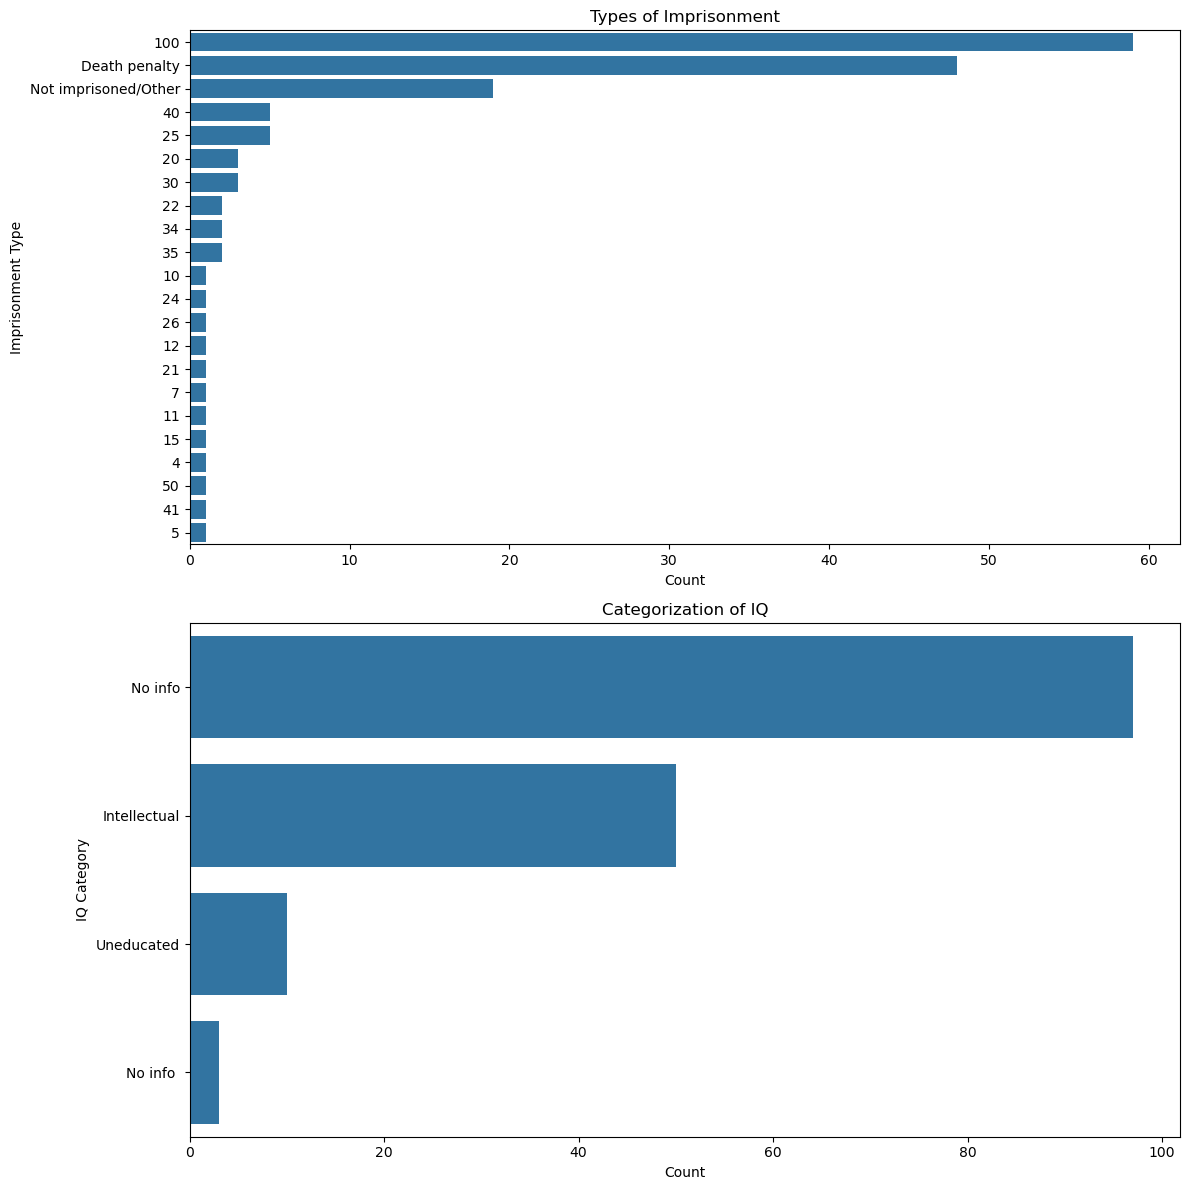

In [5]:
# Data preprocessing for the 'Imprisoned years' column
data['Imprisoned years processed'] = data['Imprisoned years'].replace(range(100, 10000), 100)
data['Imprisoned years processed'] = data['Imprisoned years processed'].replace(10000, 'Death penalty')
data['Imprisoned years processed'] = data['Imprisoned years processed'].replace(0, 'Not imprisoned/Other')

# Data preprocessing for the 'IQ' column
data['IQ processed'] = data['IQ'].replace({'Illiterate': 'Uneducated'})

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Bar chart for 'Imprisoned years processed'
sns.countplot(y='Imprisoned years processed', data=data, ax=axes[0], order=data['Imprisoned years processed'].value_counts().index)
axes[0].set_title('Types of Imprisonment')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Imprisonment Type')

# Bar chart for 'IQ processed'
sns.countplot(y='IQ processed', data=data, ax=axes[1], order=data['IQ processed'].value_counts().index)
axes[1].set_title('Categorization of IQ')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('IQ Category')

# Adjust layout
plt.tight_layout()
plt.show()


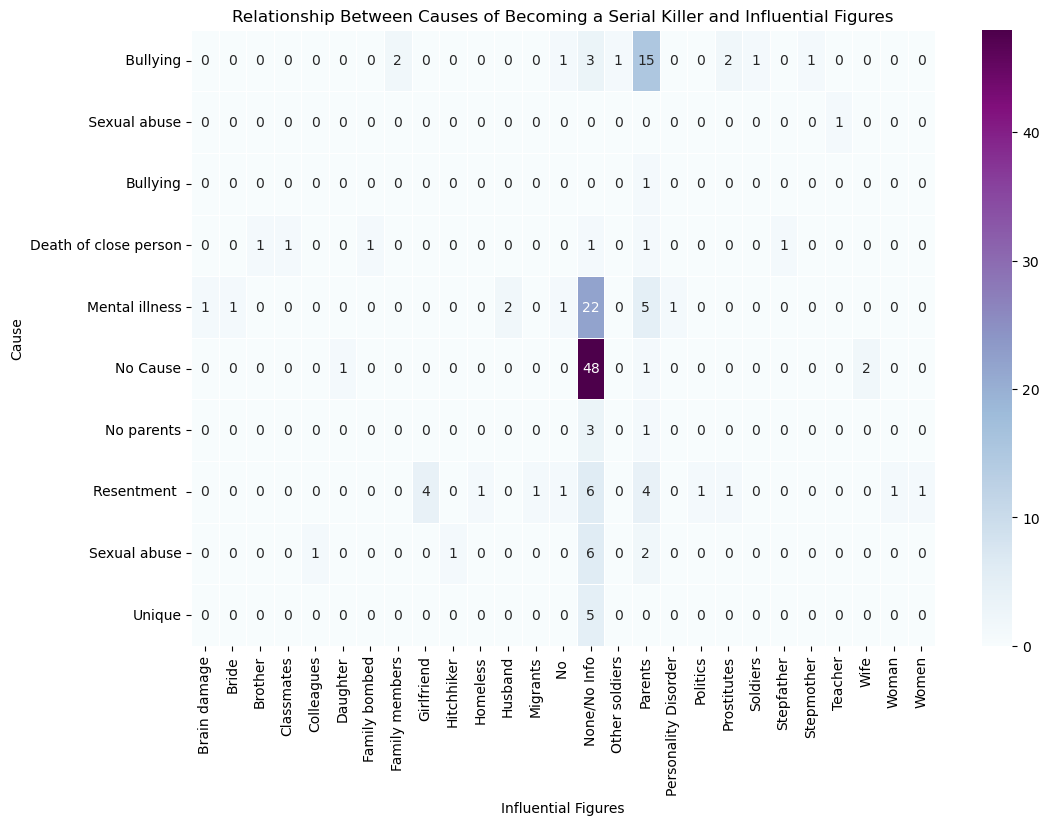

In [6]:
# Remove the leading space from the 'By whom' column name
data.rename(columns={' By whom': 'By whom'}, inplace=True)

# Adjust the 'By whom' column as previously discussed
data['By whom'] = data['By whom'].replace(['Father', 'Mother'], 'Parents')
data['By whom'] = data['By whom'].replace('No', 'None/No Info')

# Recreate the crosstab with the correctly named and adjusted data
cause_by_whom_corrected = pd.crosstab(data['Cause'], data['By whom'])

# Plot the corrected crosstab
plt.figure(figsize=(12, 8))
sns.heatmap(cause_by_whom_corrected, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Relationship Between Causes of Becoming a Serial Killer and Influential Figures')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


In [7]:
data['Cause'] = data['Cause'].replace(['Bullying ', 'Bullying'], 'Bullying')

# Verify the updates by showing unique values in the affected columns
victim_audience_unique = data['Victim audience'].unique()
cause_unique = data['Cause'].unique()

victim_audience_unique, cause_unique

(array(['Children', 'Young girls', 'Young boys', 'Women', 'Criminals',
        'All', 'Farmers', 'Ophrans', 'Older women', 'Prostitutes',
        'Homelesses', 'Motorcyclists', 'Workers', 'Homeless, no relatives',
        'Old women', 'Homosexuals and taxi drivers',
        'Women looking for marriage', 'Hitchhikers', 'Single women',
        'Homosexuals and prostitutes', 'Homeless', 'Relatives ',
        'Elderly women', 'Black women', 'Housewives', 'Young women',
        'Patients', 'Elders', 'Elderls', 'Prostitude', 'Chilldren',
        'Couples', 'Prostitutes and Dancers', 'Soldiers', 'Politics',
        'Men', 'Alcocholic men', 'ATM users', 'Prostitues', 'White women',
        'Tourists', 'Young men'], dtype=object),
 array(['Bullying', ' Sexual abuse', 'Mental illness', 'Resentment ',
        ' Bullying', 'No Cause', 'Death of close person', 'Unique',
        'Sexual abuse', 'No parents', nan], dtype=object))

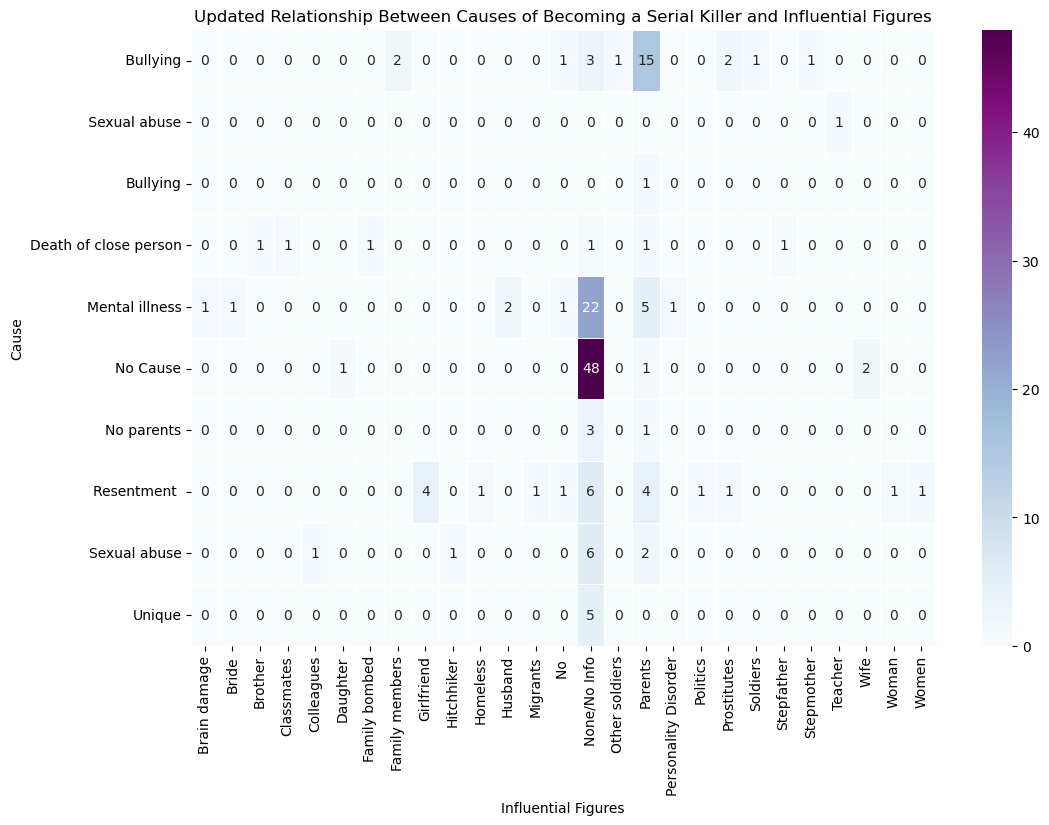

In [8]:
# Recreate the crosstab with the updated 'Cause' data for the heatmap visualization
cause_by_whom_updated = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(12, 8))
sns.heatmap(cause_by_whom_updated, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship Between Causes of Becoming a Serial Killer and Influential Figures')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


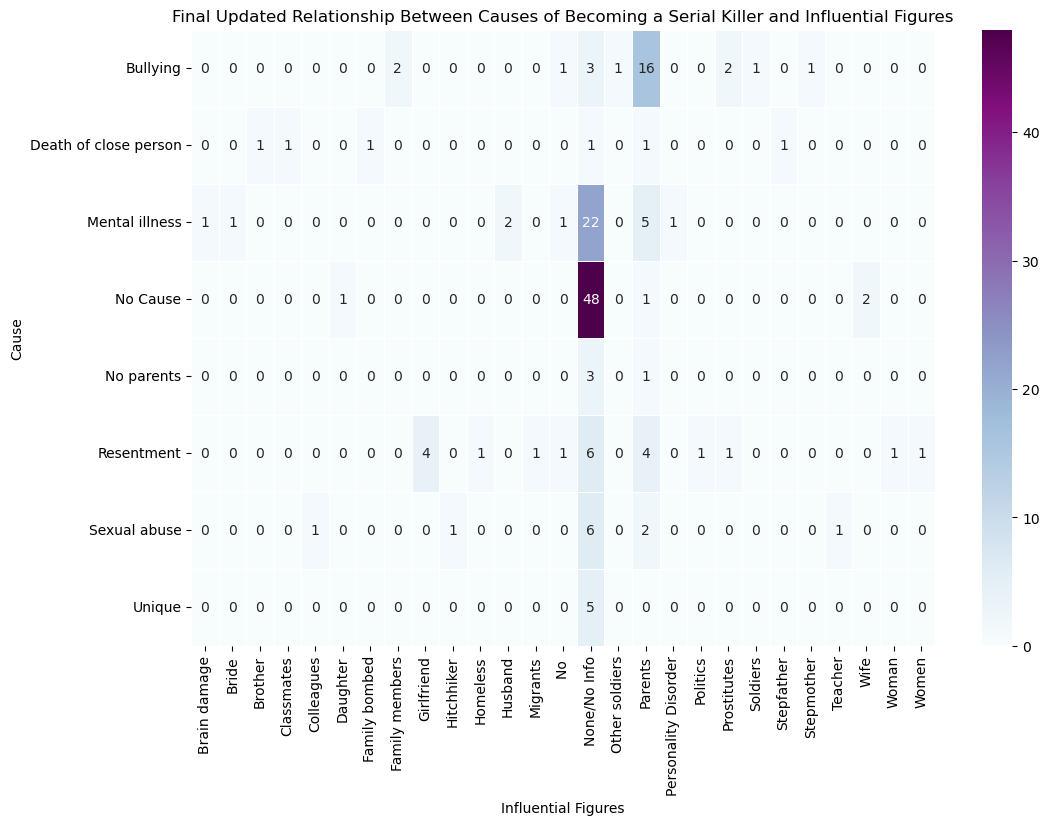

In [9]:
# Further consolidate 'Cause' column to remove any trailing spaces or slight variations
data['Cause'] = data['Cause'].str.strip()
data['Cause'] = data['Cause'].replace(['Bullying', 'Bullying '], 'Bullying')

# Recreate the crosstab with the fully consolidated 'Cause' data for the heatmap visualization
cause_by_whom_final = pd.crosstab(data['Cause'], data['By whom'])

# Plot the final updated crosstab
plt.figure(figsize=(12, 8))
sns.heatmap(cause_by_whom_final, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Final Updated Relationship Between Causes of Becoming a Serial Killer and Influential Figures')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


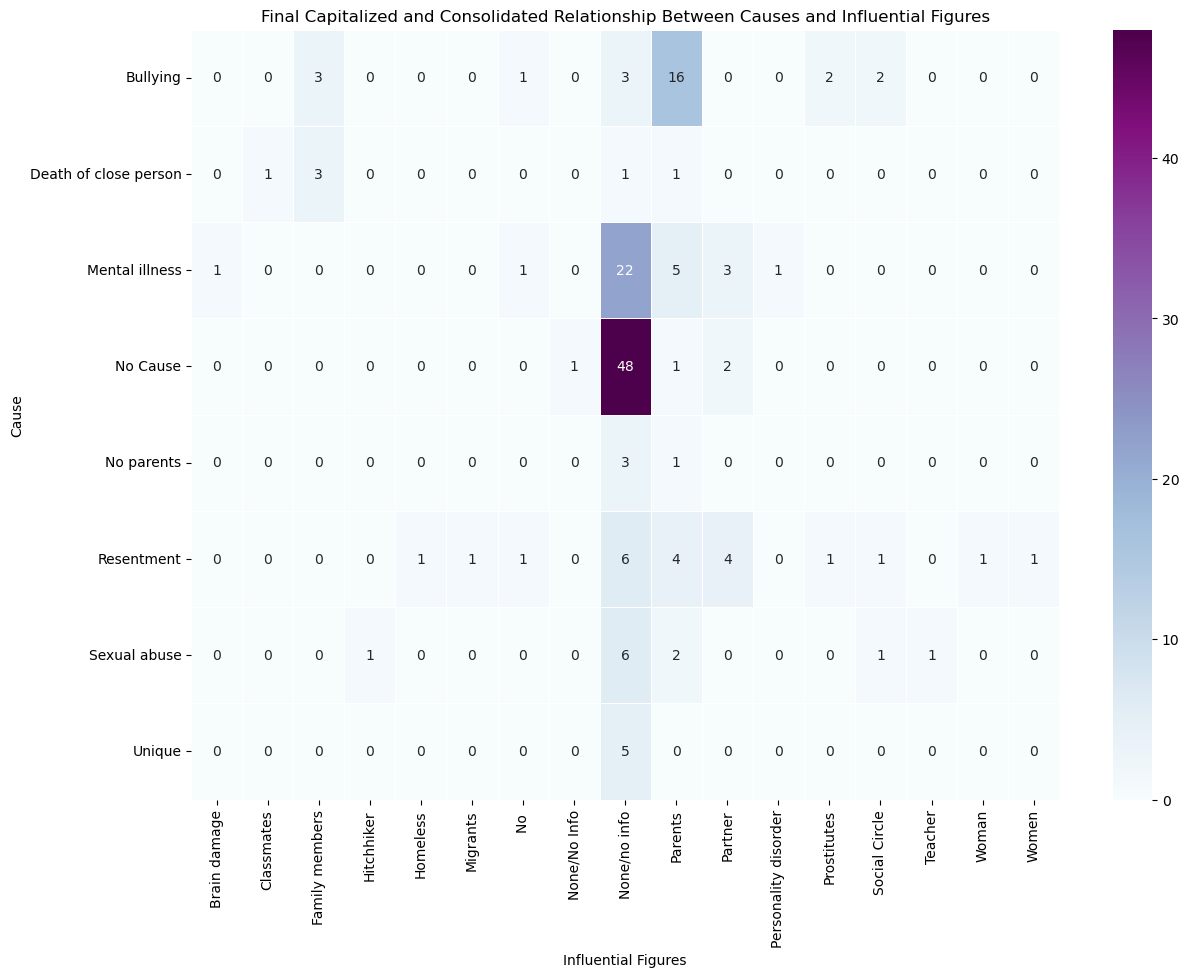

In [10]:
# Capitalize entries in 'By whom' column
data['By whom'] = data['By whom'].str.capitalize()

# Apply consolidations with capitalization
data['By whom'] = data['By whom'].replace(['Soldiers', 'Other soldiers', 'Colleagues', 'Politics'], 'Social Circle')
data['By whom'] = data['By whom'].replace(['Bride', 'Wife', 'Girlfriend', 'Husband'], 'Partner')
data['By whom'] = data['By whom'].replace(['Family bombed', 'Family members', 'Brother', 'Stepfather', 'Stepmother'], 'Family members')
data['By whom'] = data['By whom'].replace('Daughter', 'None/No Info')
data['By whom'] = data['By whom'].replace(['No', 'None', 'No info'], 'None/No Info')

# Recreate the crosstab with fully capitalized and consolidated 'By whom' data for the heatmap visualization
cause_by_whom_final_capitalized = pd.crosstab(data['Cause'], data['By whom'])

# Plot the final updated consolidated crosstab with capitalization
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_final_capitalized, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Final Capitalized and Consolidated Relationship Between Causes and Influential Figures')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


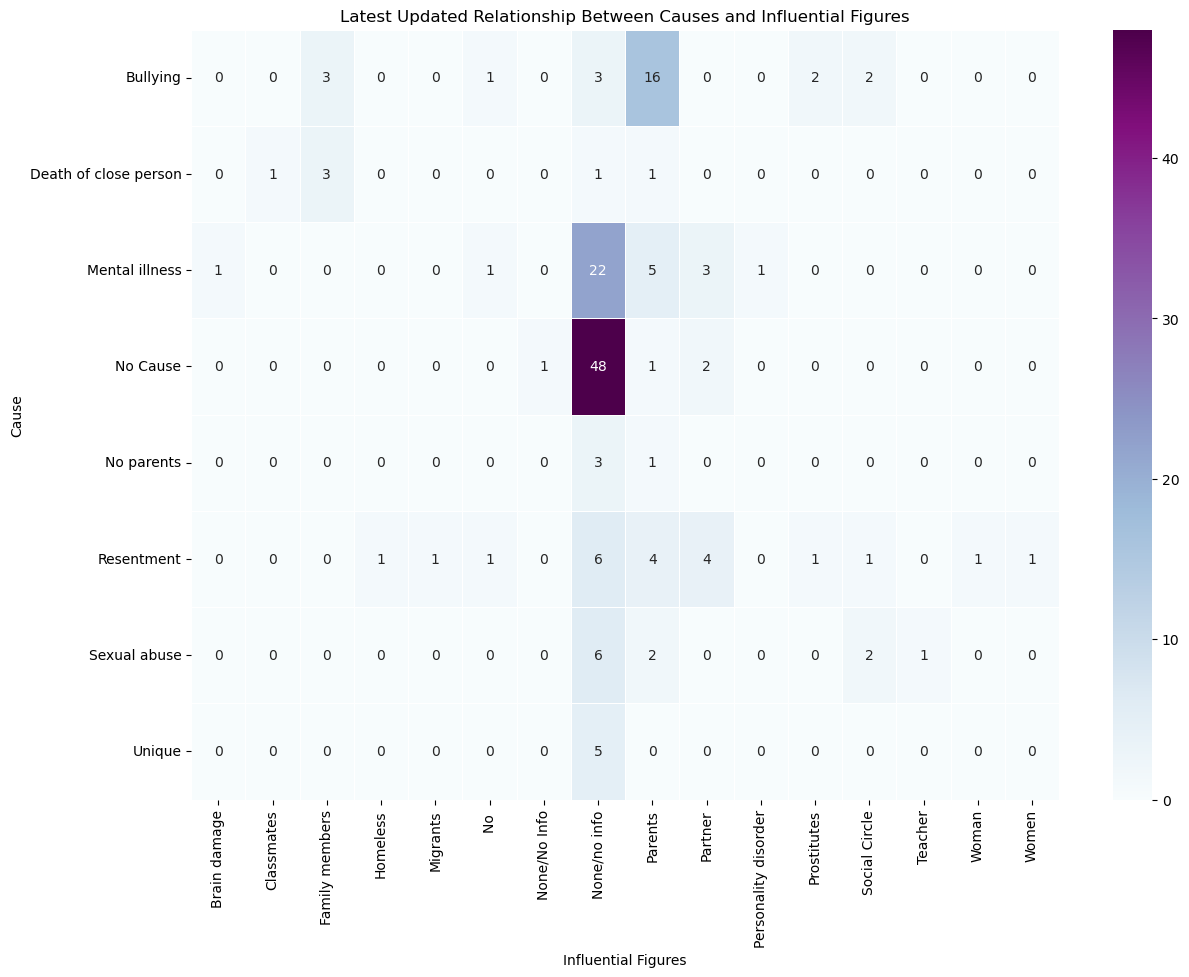

In [11]:
# Apply further consolidations and replacements
data['By whom'] = data['By whom'].replace('Hitchhiker', 'Social Circle')
data['Victim audience'] = data['Victim audience'].replace(['Woman', 'Women'], 'Women')
data = data.replace('No', 'None/No Info')

# Recreate the crosstab with the newly updated 'By whom' and 'Victim audience' data for the heatmap visualization
cause_by_whom_latest = pd.crosstab(data['Cause'], data['By whom'])

# Plot the latest updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_latest, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Latest Updated Relationship Between Causes and Influential Figures')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


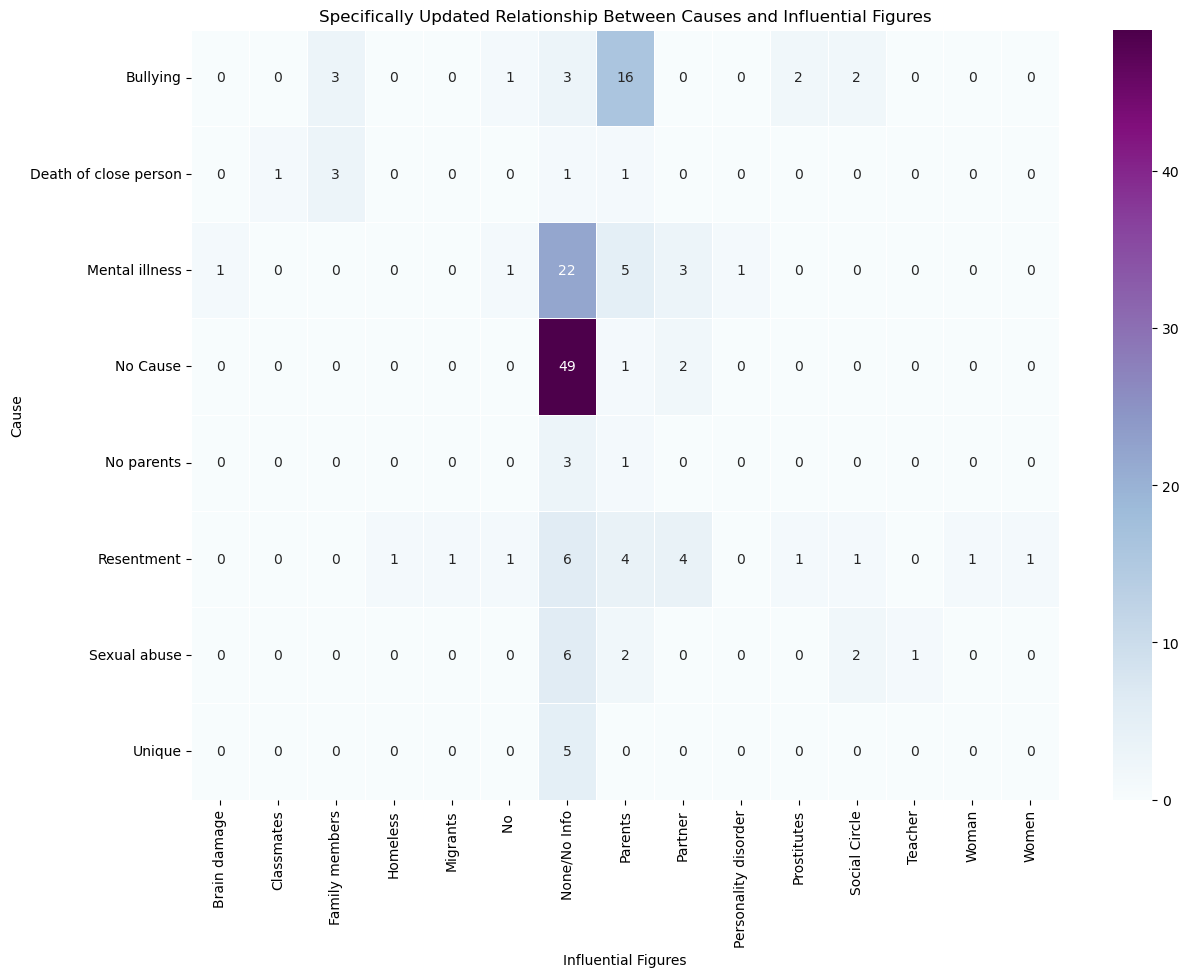

In [12]:
# Adjust the term 'No' to 'None/no info' with specific capitalization
data = data.replace('None/no info', 'None/No Info')

# Recreate the crosstab with the specific 'None/no info' replacement for the heatmap visualization
cause_by_whom_specific = pd.crosstab(data['Cause'], data['By whom'])

# Plot the specific updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_specific, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Specifically Updated Relationship Between Causes and Influential Figures')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


In [13]:
# Correct the replacements in the 'By whom' column
data['By whom'] = data['By whom'].replace(['Woman', 'Women'], 'Prostitutes')

# Verify the updated unique values in 'By whom' to ensure changes are applied
updated_by_whom = data['By whom'].unique()
updated_by_whom


array(['Parents', 'Teacher', 'None/No Info', 'Family members', 'Partner',
       'Classmates', 'Brain damage', 'Prostitutes', 'Social Circle',
       'Homeless', 'Migrants', 'No ', 'Personality disorder'],
      dtype=object)

In [14]:
# Correct the replacements in the 'By whom' column
data['By whom'] = data['By whom'].replace('No ', 'None/No Info')

# Verify the updated unique values in 'By whom' to ensure changes are applied
updated_by_whom = data['By whom'].unique()
updated_by_whom

array(['Parents', 'Teacher', 'None/No Info', 'Family members', 'Partner',
       'Classmates', 'Brain damage', 'Prostitutes', 'Social Circle',
       'Homeless', 'Migrants', 'Personality disorder'], dtype=object)

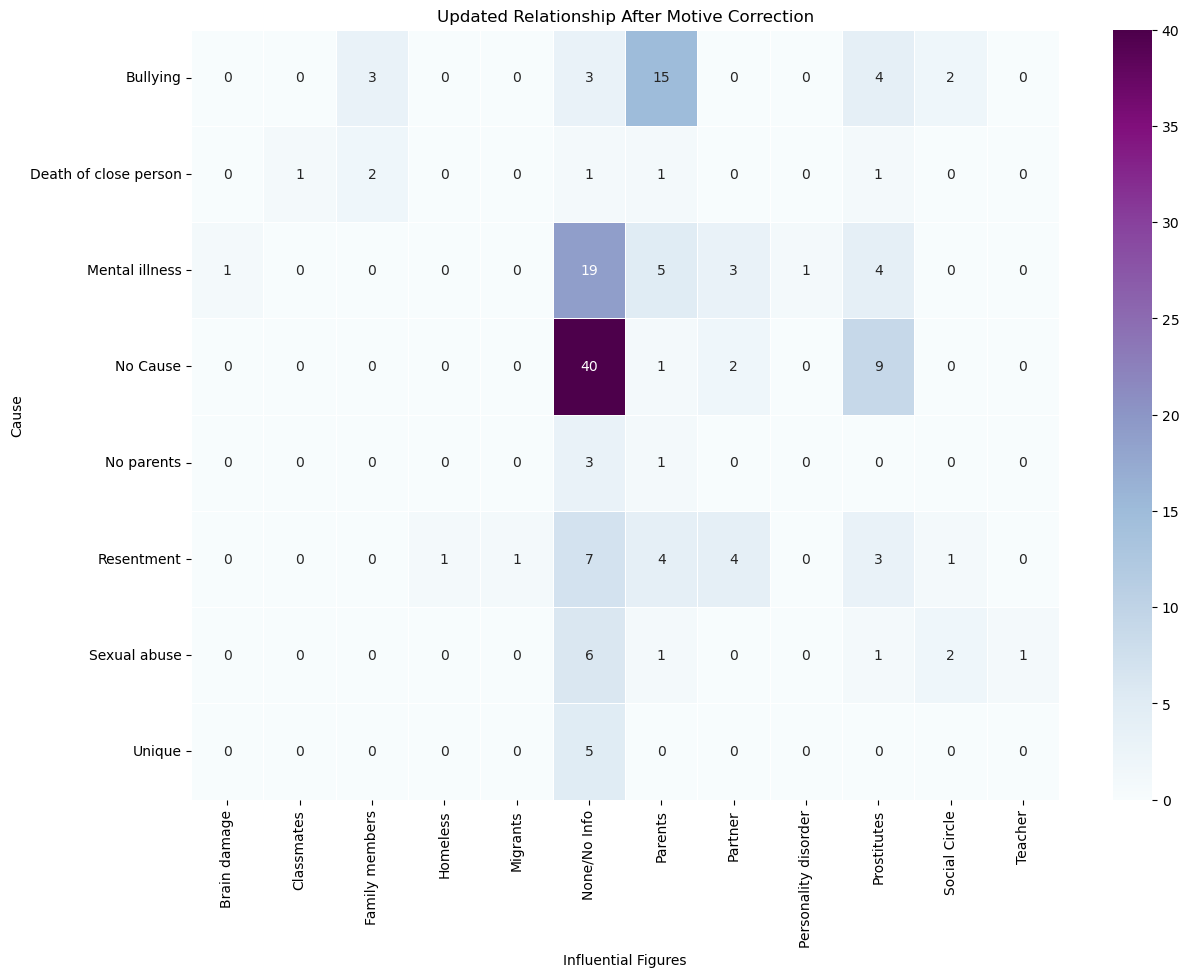

In [15]:
# Update 'Motive' from 'Selfish' to 'Pervert' and 'By whom' to 'Prostitutes'
data.loc[data['Motive'] == 'Selfish', 'Motive'] = 'Pervert'
data.loc[data['Motive'] == 'Pervert', 'By whom'] = 'Prostitutes'

# Recreate the crosstab with the updated 'Motive' and 'By whom' data for the heatmap visualization
cause_by_whom_final_adjustment = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_final_adjustment, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Motive Correction')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


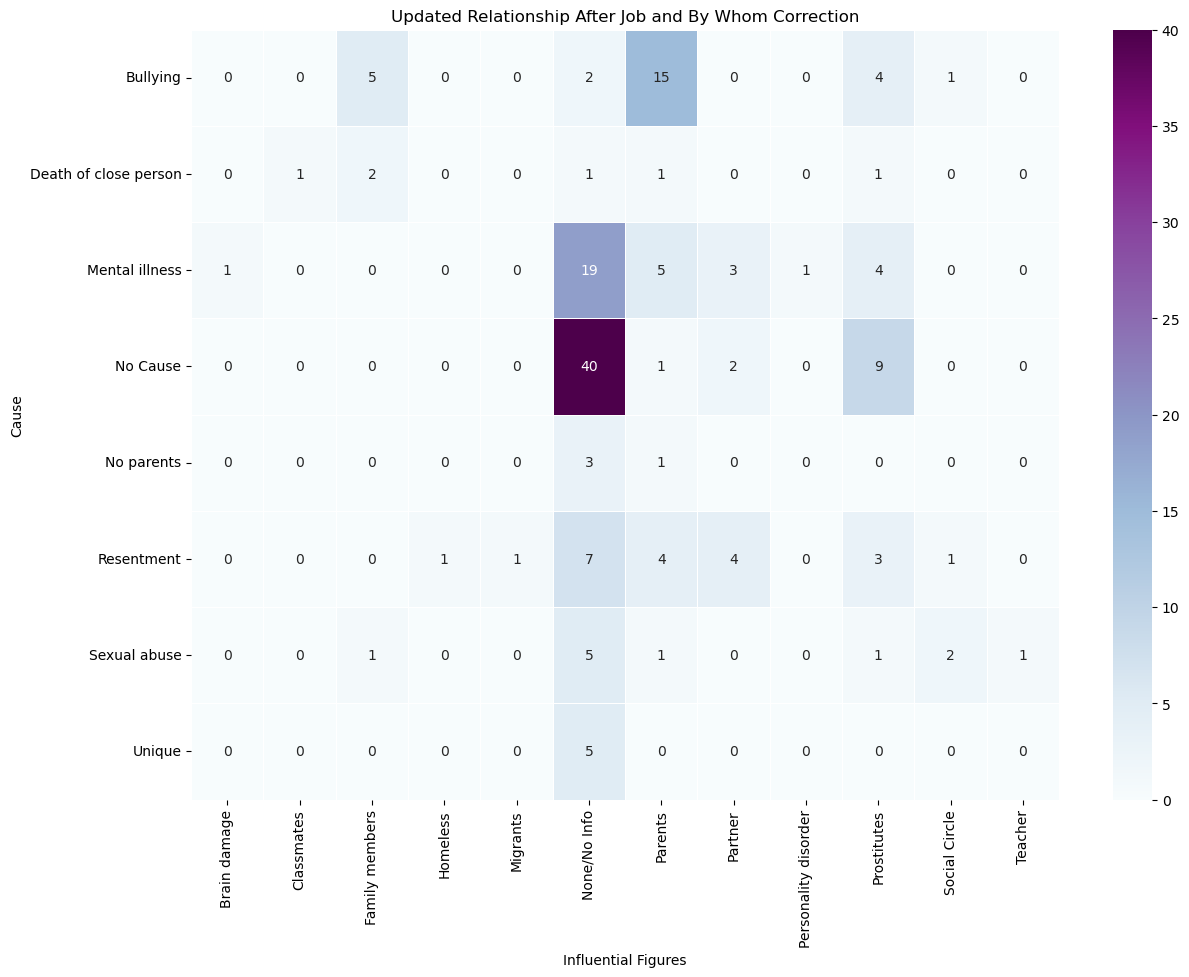

In [16]:
# Update 'Job' from 'Gay pickup' to 'Male prostitute' and 'By whom' to 'Family members'
data.loc[data['Job'] == 'Gay pickup', 'Job'] = 'Male prostitute'
data.loc[data['Job'] == 'Male prostitute', 'By whom'] = 'Family members'

# Recreate the crosstab with the updated 'Job' and 'By whom' data for the heatmap visualization
cause_by_whom_job_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_job_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Job and By Whom Correction')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


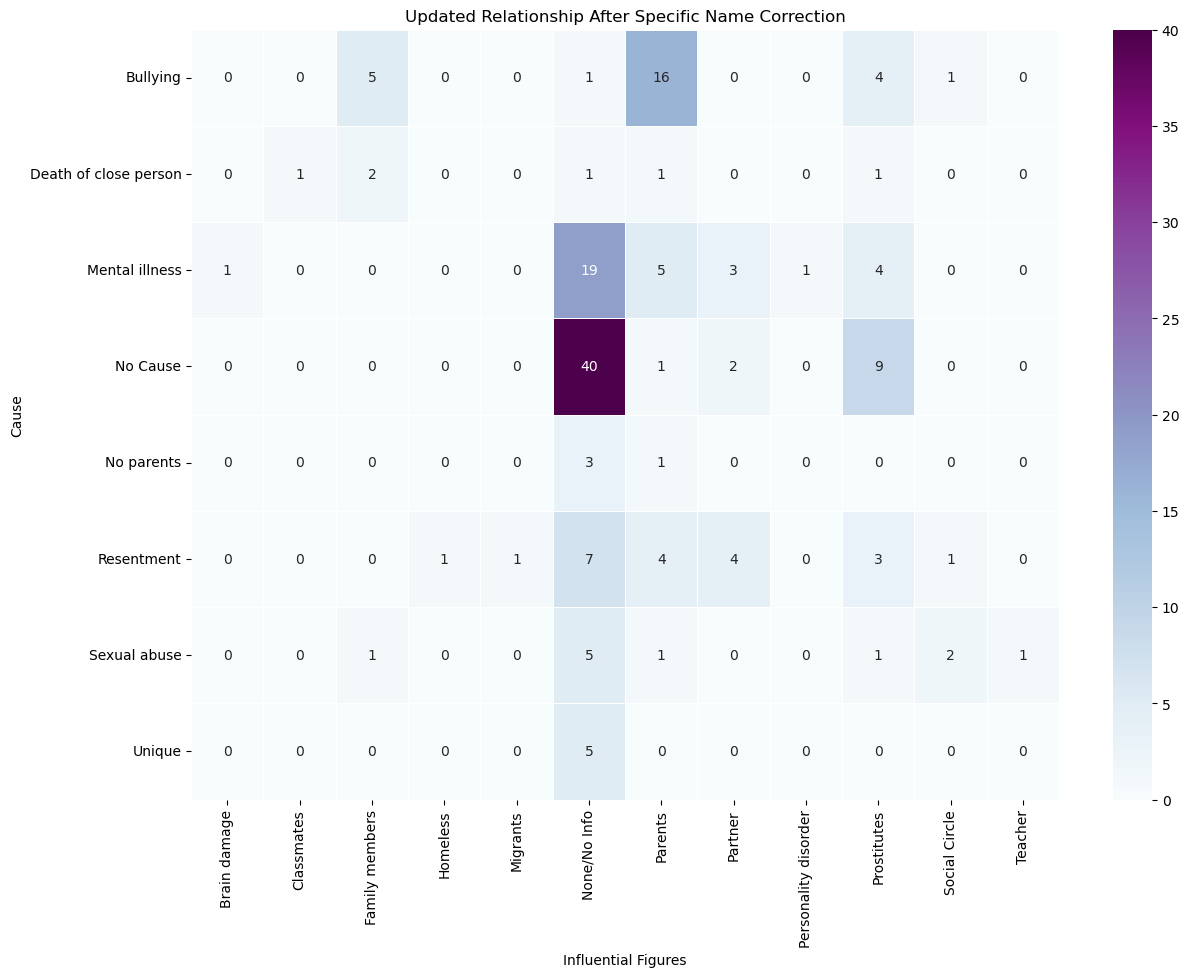

In [17]:
# Update 'By whom' to 'Parents' for the specific entry
data.loc[data['Name'] == 'Bakhtiyor Matyakubov', 'By whom'] = 'Parents'

# Recreate the crosstab with the latest 'By whom' data for the heatmap visualization
cause_by_whom_specific_name = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_specific_name, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Specific Name Correction')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


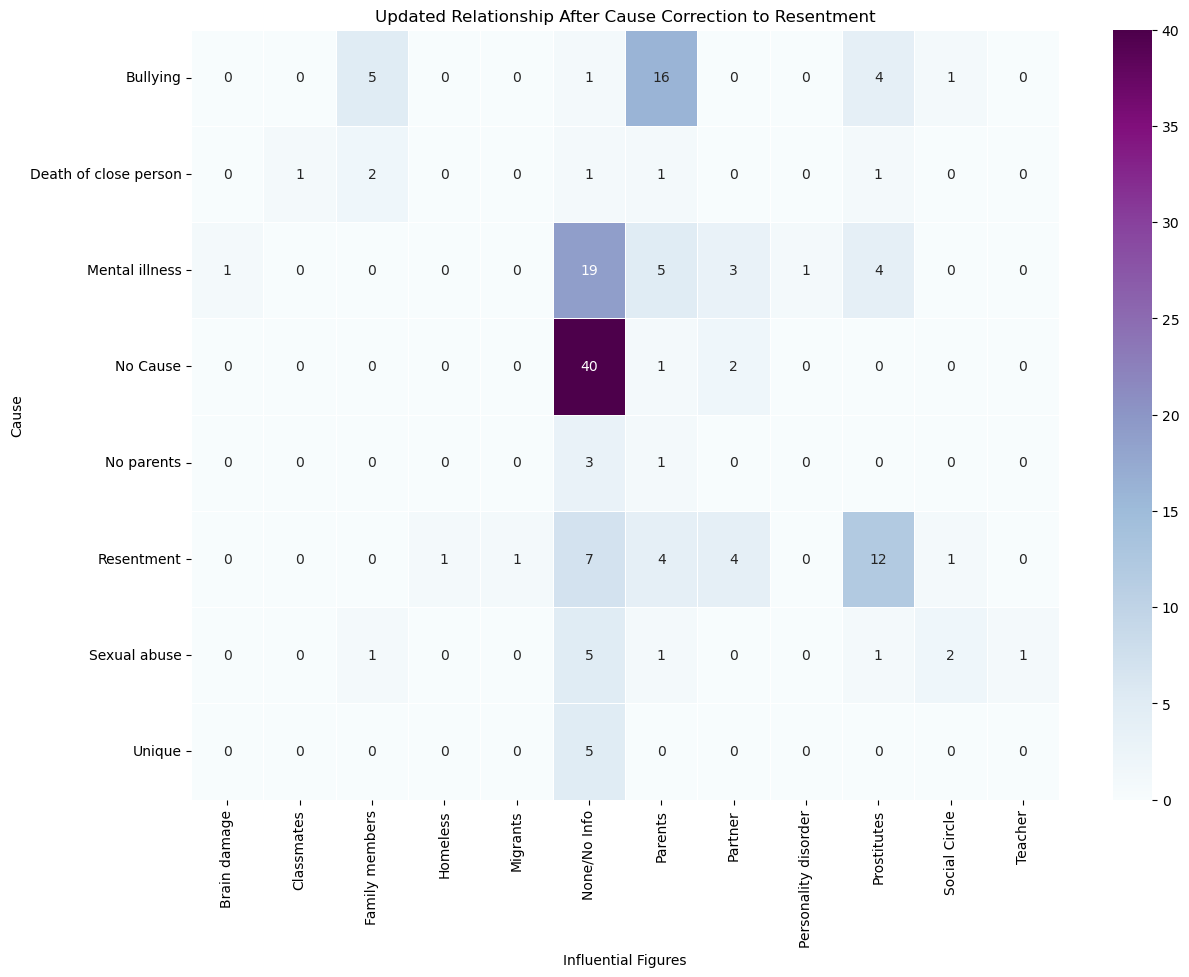

In [18]:
# Update 'Cause' from 'No Cause' to 'Resentment' for the specified entries
data.loc[(data['Cause'] == 'No Cause') & (data['By whom'] == 'Prostitutes'), 'Cause'] = 'Resentment'

# Recreate the crosstab with the corrected 'Cause' data for the heatmap visualization
cause_by_whom_resentment_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_resentment_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Cause Correction to Resentment')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


In [19]:
data.loc[(data['Cause'] == 'No Cause') & (data['By whom'] == 'Parents'), 'Cause'] = 'Resentment'

In [20]:
data.loc[(data['Cause'] == 'No Cause') & (data['By whom'] == 'Partner'), 'Cause'] = 'Resentment'

In [21]:
data['By whom'] = data['By whom'].replace(['Prostitutes'], 'Prostitutes/Women')

In [22]:
data['Cause'] = data['Cause'].replace(['Resentment'], 'Resentment/Hate')

In [23]:
data.loc[(data['Name'] == 'Naceur Damergi'), 'Job'] = 'Agriculture employee'
data.loc[(data['Name'] == 'Naceur Damergi'), 'IQ'] = 'Intellectual'


In [24]:
data.loc[(data['Name'] == 'Naceur Damergi'), 'Resentment'] = 'Parents'
data.loc[(data['Name'] == 'Antonina Makarova'), 'Resentment'] = 'Social Circle'


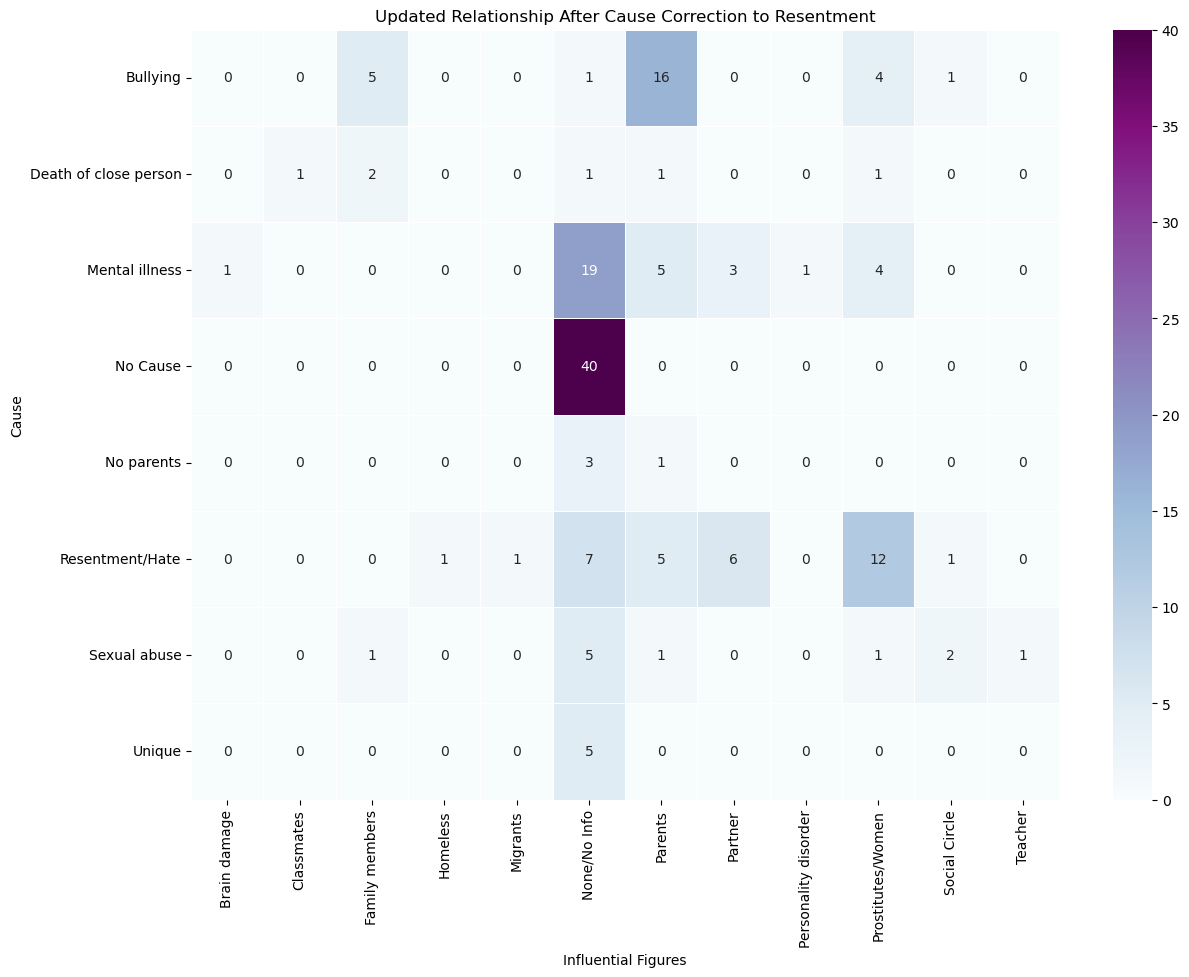

In [25]:
cause_by_whom_resentment_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_resentment_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Cause Correction to Resentment')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


In [26]:
data.loc[(data['Cause'] == 'Resentment/Hate') & (data['By whom'] == 'None/No Info'), 'By whom'] = 'Prostitutes/Women'

In [27]:
data.loc[(data['Name'] == 'Marcelo Costa de Andrade'), 'By whom'] = 'Social Circle'
data.loc[(data['Name'] == 'Peter Sutcliffe'), 'By whom'] = 'Parents'
data.loc[(data['Name'] == 'Peter Sutcliffe'), 'Cause'] = 'Bullying'
data.loc[(data['Name'] == 'Naceur Damergi'), 'By whom'] = 'Parents'
data.loc[(data['Name'] == 'Antonina Makarova'), 'By whom'] = 'Social Circle'
data.loc[(data['Name'] == 'Arthur Shawcross'), 'By whom'] = 'Parents'
data.loc[(data['Name'] == 'Carol Bundy'), 'By whom'] = 'Parents'
data.loc[(data['Name'] == 'Moses Sithole'), 'By whom'] = 'Parents'
data.loc[(data['Name'] == 'Moses Sithole'), 'Cause'] = 'Resentment/Hate'
data.loc[(data['Name'] == 'Ronald Dominique'), 'By whom'] = 'Social Circle'
data.loc[(data['Name'] == 'Ronald Dominique'), 'Cause'] = 'Bullying'
data.loc[(data['Name'] == 'Ronald Dominique'), 'IQ'] = 'Intellectual'


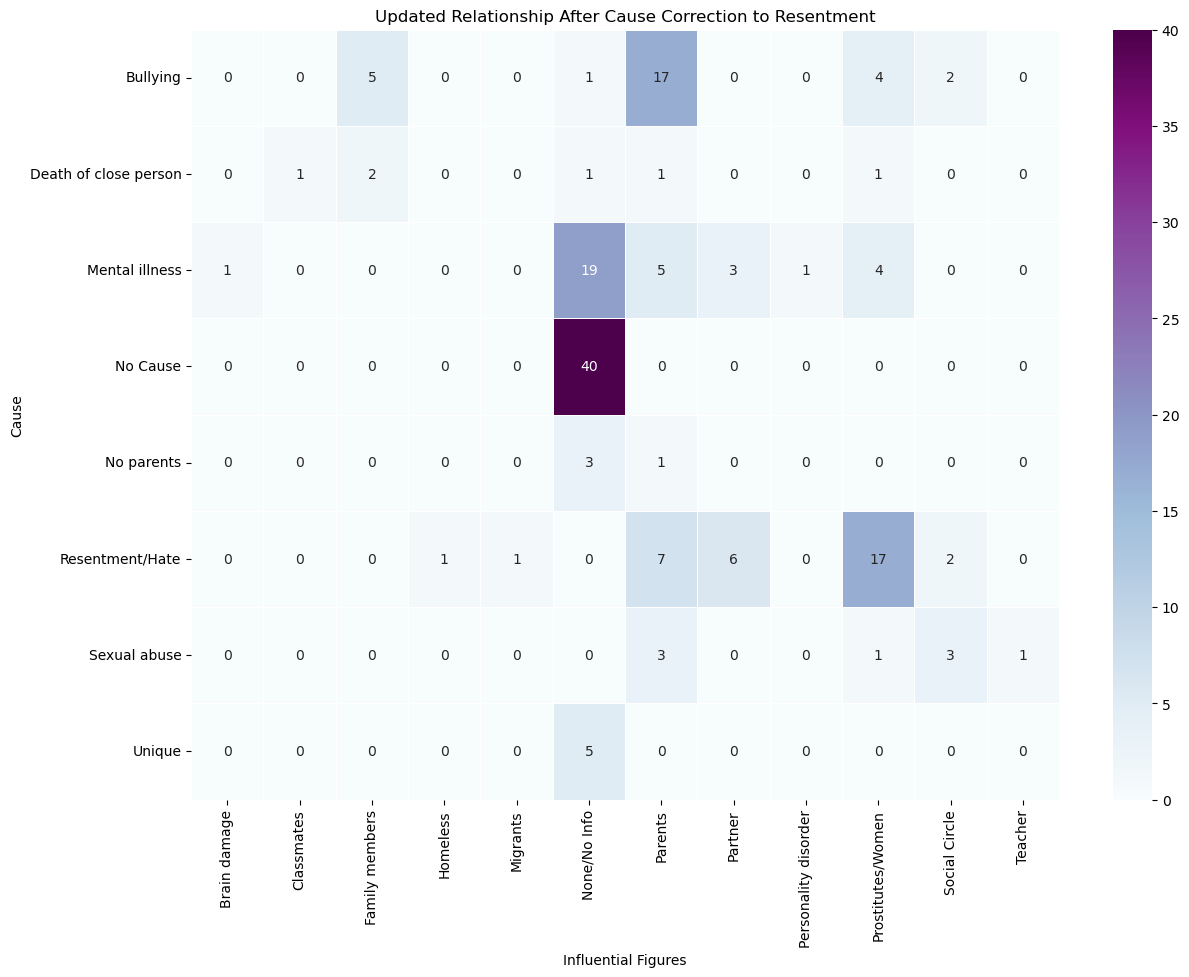

In [28]:
cause_by_whom_resentment_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_resentment_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Cause Correction to Resentment')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()


In [29]:
data.loc[(data['Cause'] == 'Mental illness') & (data['By whom'] == 'Parents'), 'By whom'] = 'Brain damage'
data.loc[(data['Cause'] == 'No Parents') & (data['By whom'] == 'None/No Info'), 'By whom'] = 'Parents'
data.loc[(data['Cause'] == 'Mental illness') & (data['By whom'] == 'Partner'), 'By whom'] = 'Brain damage'
data.loc[(data['Cause'] == 'Mental illness') & (data['By whom'] == 'Prostitutes/Women'), 'By whom'] = 'Personality disorder'


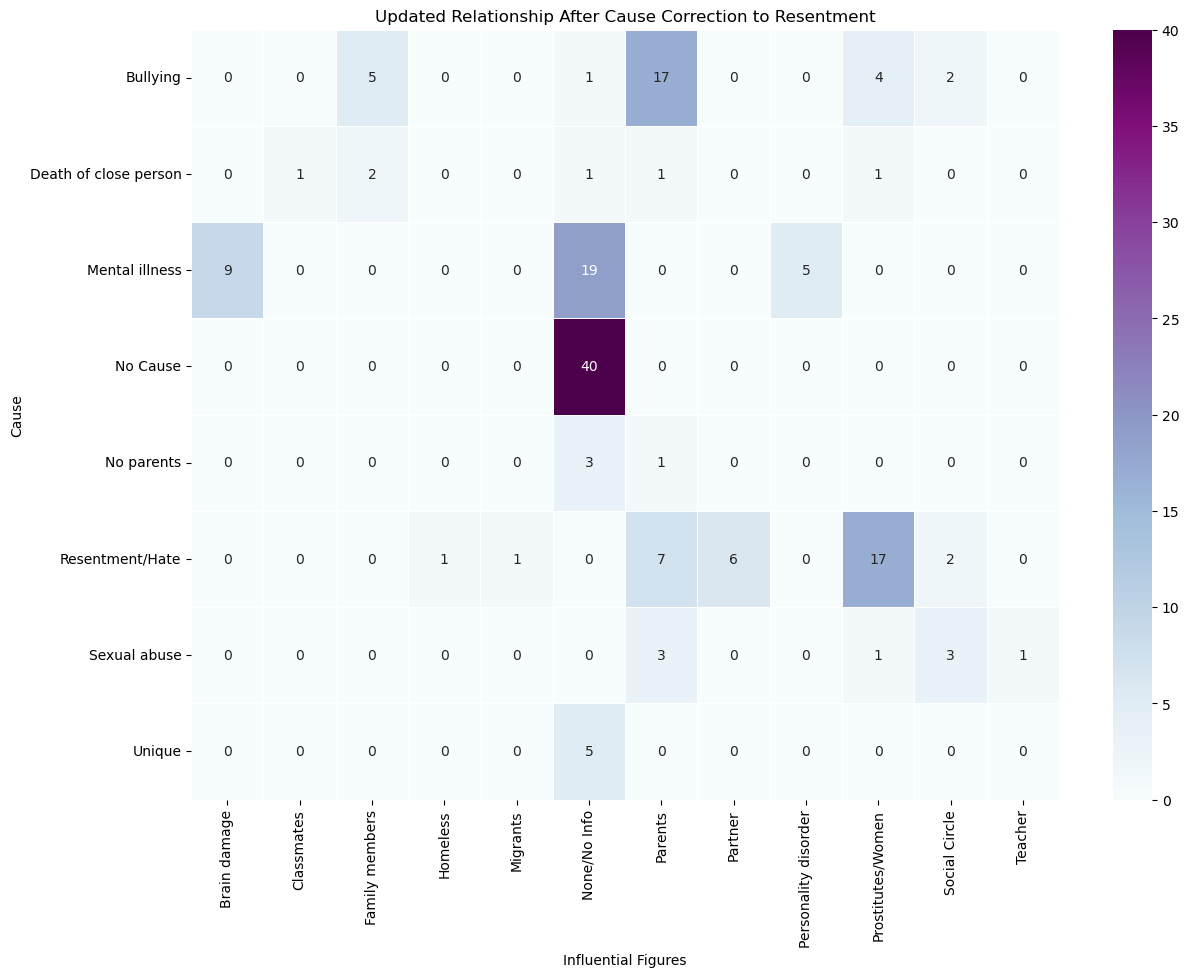

In [30]:
cause_by_whom_resentment_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_resentment_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Cause Correction to Resentment')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()

In [31]:
data['By whom'] = data['By whom'].replace(['None/No Info'], 'None/No one')

In [32]:
data.loc[(data['Cause'] == 'Death of close person') & (data['By whom'] == 'Prostitutes/Women'), 'By whom'] = 'Family members'


In [33]:
data.loc[(data['Cause'] == 'Death of close person') & (data['By whom'] == 'None/No one'), 'By whom'] = 'Family members'
data.loc[(data['Cause'] == 'Bullying') & (data['By whom'] == 'None/No one'), 'By whom'] = 'Parents'


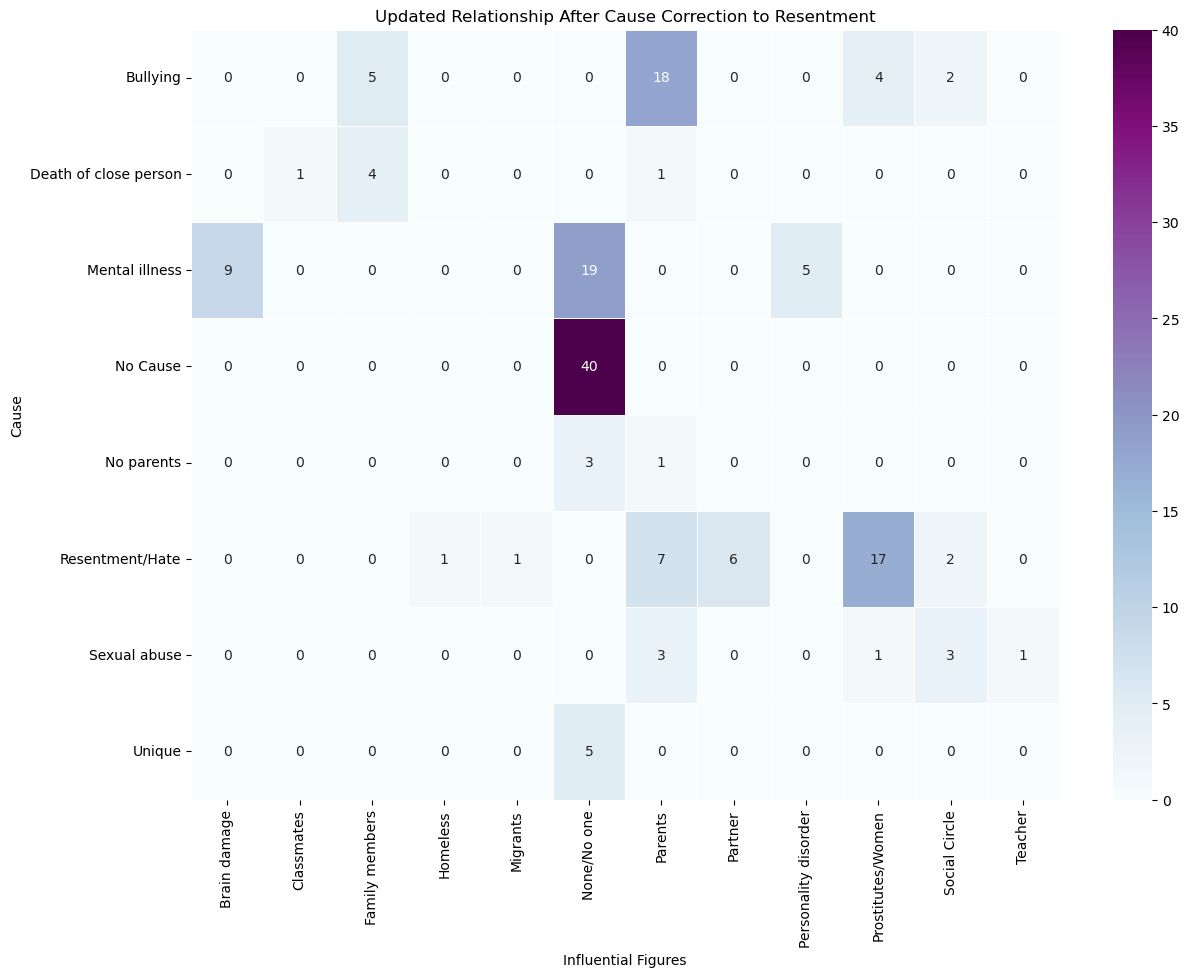

In [34]:
cause_by_whom_resentment_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(14, 10))
sns.heatmap(cause_by_whom_resentment_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Cause Correction to Resentment')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()

In [35]:
data.loc[(data['Cause'] == 'No parents') & (data['By whom'] == 'None/No one'), 'By whom'] = 'Parents'


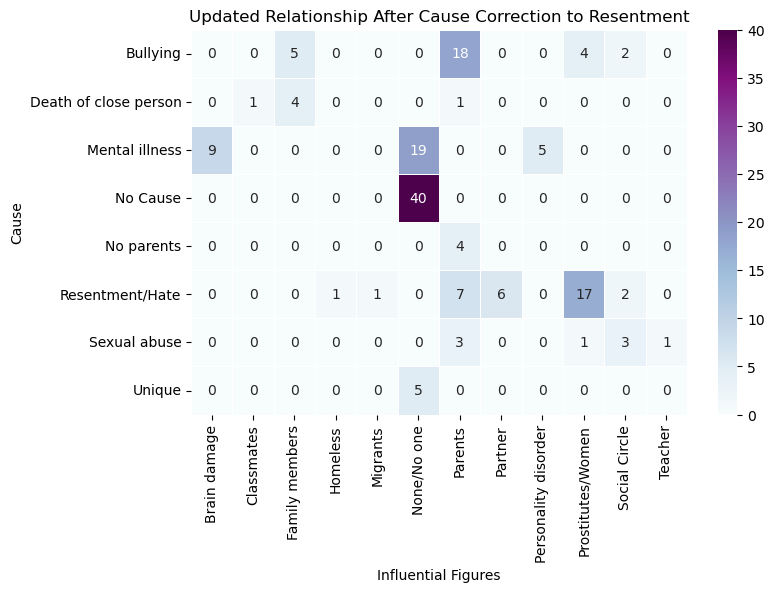

In [39]:
cause_by_whom_resentment_update = pd.crosstab(data['Cause'], data['By whom'])

# Plot the updated crosstab
plt.figure(figsize=(8, 5))
sns.heatmap(cause_by_whom_resentment_update, annot=True, fmt="d", cmap="BuPu", linewidths=.5)
plt.title('Updated Relationship After Cause Correction to Resentment')
plt.xlabel('Influential Figures')
plt.ylabel('Cause')
plt.show()

In [40]:
data.to_csv('serialkiller0705.csv', index=False)

In [41]:
data.head()

,Name,Gender,Birth date,Country,Job,First crime age,Cause,Motive,Victim audience,Proven victims,...,Family,Weapon,Alive or dead,By whom,IQ,memorable,unique,Imprisoned years processed,IQ processed,Resentment
0,Luis Garavito,Male,25.01.1957,Colombia,Street vendor,35,Bullying,Desire for power,Children,193,...,Eldest,Knife,Dead,Parents,Illiterate,NaN,NaN,22,Uneducated,nan
1,Pedro Lopez,Male,08.10.1948,Colombia,Sex worker,22,Sexual abuse,Revenge,Young girls,110,...,Middle,Bare hands,Alive,Teacher,Illiterate,NaN,occasionally exhume the victim's bodies from t...,25,Uneducated,nan
2,Javed Iqbal,Male,08.10.1956,Pakistan,Businessman,42,Mental illness,Revenge,Young boys,100,...,Middle,Acid,Dead,None/No one,Intellectual,NaN,NaN,100,Intellectual,nan
3,Mikhail Popkov,Male,07.03.1964,Russia,Police,34,Resentment/Hate,The desire to cleanse the world of vicious women,Women,86,...,Eldest,Metal object,Alive,Prostitutes/Women,No info,NaN,All the female victims were of average height ...,100,No info,nan
4,Daniel Barbosa,Male,22.01.1930,Colombia,Street vendor,44,Bullying,Getting rid of virgins,Young girls,72,...,Only child,Knife,Dead,Family members,Intellectual,NaN,NaN,41,Intellectual,nan


In [42]:
data['Weapon'].unique()

array(['Knife', 'Bare hands', 'Acid', 'Metal object', 'Hammer', 'Rope',
       'Axes', 'Shooting', 'Cable', 'Saw', 'Bottle', 'Fire', 'Rock',
       'Injection', 'Pills', 'Car', 'Caliber', 'Unidentified', 'Stone',
       'Poison', 'Clothes', 'Firearms', 'Bludgeon', 'No info', 'Heater'],
      dtype=object)

In [5]:
data['Weapon'] = data['Weapon'].replace(['No info'], 'Unidentified')
data['Weapon'] = data['Weapon'].replace(['Caliber'], 'Shooting')
data['Weapon'] = data['Weapon'].replace(['Pills', 'Injection', 'Poison'], 'Pills/Injection')
data['Weapon'] = data['Weapon'].replace(['Stone'], 'Rock')
data['Weapon'] = data['Weapon'].replace(['Hammer', 'Axes'], 'Hammer/Axes')
data['Weapon'] = data['Weapon'].replace(['Firearms'], 'Shooting')


In [44]:
data['Weapon'].unique()

array(['Knife', 'Bare hands', 'Acid', 'Metal object', 'Hammer/Axes',
       'Rope', 'Shooting', 'Cable', 'Saw', 'Bottle', 'Fire', 'Rock',
       'Pills/Injection', 'Car', 'Unidentified', 'Clothes', 'Bludgeon',
       'Heater'], dtype=object)

In [45]:
data['Weapon'].value_counts()

Weapon
Bare hands         43
Knife              25
Hammer/Axes        21
Shooting           17
Metal object       14
Pills/Injection    12
Unidentified        6
Fire                4
Rock                4
Acid                2
Rope                2
Cable               2
Bludgeon            2
Clothes             2
Bottle              1
Car                 1
Saw                 1
Heater              1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Weapon'>

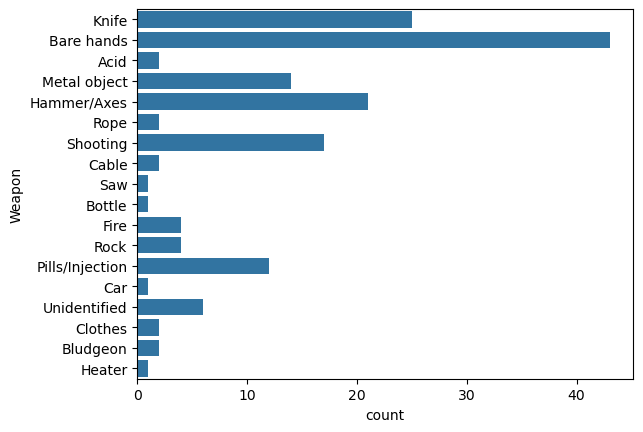

In [46]:
sns.countplot(data['Weapon'])

In [47]:
data['Victim audience'].unique()

array(['Children', 'Young girls', 'Young boys', 'Women', 'Criminals',
       'All', 'Farmers', 'Ophrans', 'Older women', 'Prostitutes',
       'Homelesses', 'Motorcyclists', 'Workers', 'Homeless, no relatives',
       'Old women', 'Homosexuals and taxi drivers',
       'Women looking for marriage', 'Hitchhikers', 'Single women',
       'Homosexuals and prostitutes', 'Homeless', 'Relatives ',
       'Elderly women', 'Black women', 'Housewives', 'Young women',
       'Patients', 'Elders', 'Elderls', 'Prostitude', 'Chilldren',
       'Couples', 'Prostitutes and Dancers', 'Soldiers', 'Politics',
       'Men', 'Alcocholic men', 'ATM users', 'Prostitues', 'White women',
       'Tourists', 'Young men'], dtype=object)

Text(0.5, 1.0, 'Distribution of Causes')

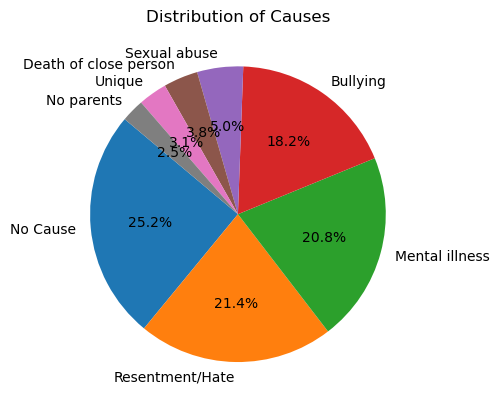

In [51]:
# Cause Distribution
cause_counts = data['Cause'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Causes')

In [6]:
# Consolidating similar motives into broader categories
def consolidate_motive(motive):
    if pd.isna(motive):
        return motive
    motive = motive.lower()
    if 'power' in motive or 'famous' in motive or 'superhuman' in motive:
        return 'Desire for Power or Fame'
    if 'revenge' in motive or 'hatred' in motive or 'hate' in motive or 'misanthropy' in motive:
        return 'Revenge or Hatred'
    if 'pervert' in motive or 'sadism' in motive or 'necrophilia' in motive or 'cannibalism' in motive or 'satanism' in motive:
        return 'Sexual or Sadistic Pleasure'
    if 'cleanse' in motive or 'cleaning' in motive or 'social change' in motive:
        return 'Cleansing or Societal Change'
    if 'robbery' in motive or 'stealing' in motive or 'material gain' in motive:
        return 'Robbery or Material Gain'
    if 'mental' in motive or 'not asked' in motive:
        return 'Mental Illness or Psychological Issues'
    if 'no info' in motive or 'no motive' in motive:
        return 'Miscellaneous or Undefined'
    return 'Other Motives'

# Apply the consolidation function to the Motive column
data['Consolidated Motive'] = data['Motive'].apply(consolidate_motive)

# Display the updated distribution of motives
data['Consolidated Motive'].value_counts()


Consolidated Motive
Revenge or Hatred                         36
Other Motives                             29
Sexual or Sadistic Pleasure               25
Miscellaneous or Undefined                24
Desire for Power or Fame                  22
Robbery or Material Gain                  11
Cleansing or Societal Change              10
Mental Illness or Psychological Issues     2
Name: count, dtype: int64

C:\Users\ASUS ViVoBooK\AppData\Local\Temp\ipykernel_26156\2857495135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax[0, 0], palette='viridis')


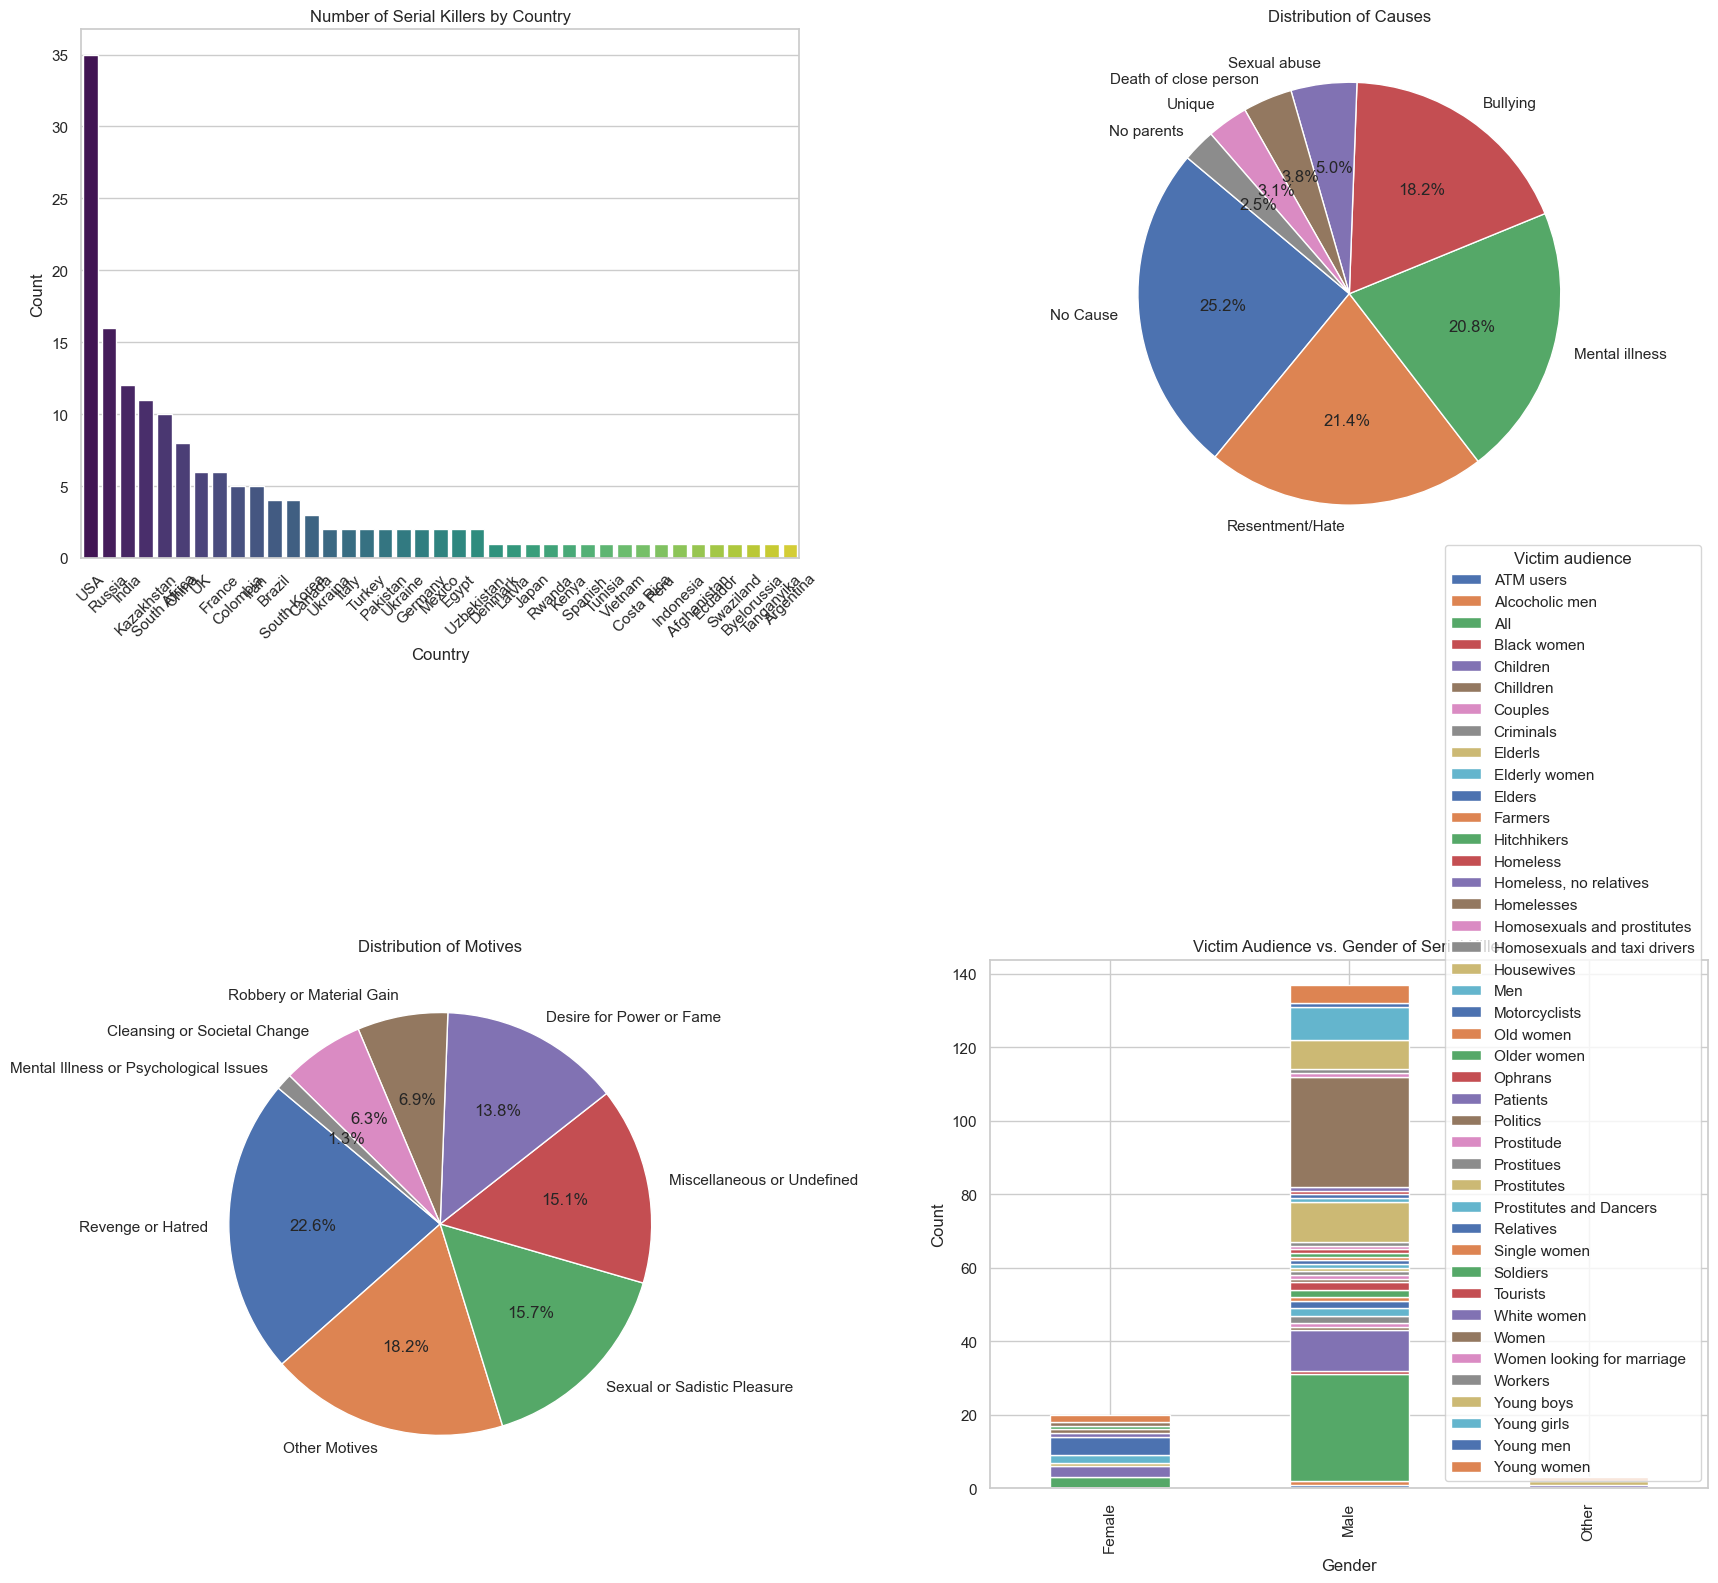

In [7]:


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating visualizations

# Country Distribution
fig, ax = plt.subplots(2, 2, figsize=(18, 16))

country_counts = data['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Number of Serial Killers by Country')
ax[0, 0].set_xlabel('Country')
ax[0, 0].set_ylabel('Count')
ax[0, 0].tick_params(axis='x', rotation=45)

# Cause Distribution
cause_counts = data['Cause'].value_counts()
ax[0, 1].pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
ax[0, 1].set_title('Distribution of Causes')

# Motive Distribution
motive_counts = data['Consolidated Motive'].value_counts()
ax[1, 0].pie(motive_counts, labels=motive_counts.index, autopct='%1.1f%%', startangle=140)
ax[1, 0].set_title('Distribution of Motives')

# Victim Distribution by Gender of Serial Killer
gender_victim = data.groupby(['Gender', 'Victim audience']).size().unstack(fill_value=0)
gender_victim.plot(kind='bar', stacked=True, ax=ax[1, 1])
ax[1, 1].set_title('Victim Audience vs. Gender of Serial Killer')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [8]:
# Consolidating similar victim audiences into broader categories
def consolidate_victims(victim):
    if pd.isna(victim):
        return victim
    victim = victim.lower().strip()
    if 'children' in victim or 'chilldren' in victim:
        return 'Children'
    if 'young' in victim:
        return 'Young Individuals'
    if 'women' in victim and 'men' not in victim and 'homosexuals' not in victim:
        return 'Women'
    if 'men' in victim and 'women' not in victim:
        return 'Men'
    if 'elder' in victim:
        return 'Elderly'
    if 'prostitu' in victim:
        return 'Prostitutes'
    if 'homeless' in victim:
        return 'Homeless'
    if 'homosexual' in victim:
        return 'Homosexuals'
    if 'criminal' in victim:
        return 'Criminals'
    return 'Miscellaneous Groups'

# Apply the consolidation function to the Victim audience column
data['Consolidated Victim Audience'] = data['Victim audience'].apply(consolidate_victims)

# Display the updated distribution of victim audiences
data['Consolidated Victim Audience'].value_counts()


Consolidated Victim Audience
Miscellaneous Groups    83
Young Individuals       25
Prostitutes             16
Children                15
Elderly                 12
Homeless                 4
Criminals                2
Men                      2
Homosexuals              1
Name: count, dtype: int64

In [58]:

# Clean the 'Imprisoned years processed' column to handle non-numeric values
# Convert 'Death penalty' and similar non-numeric entries to NaN for the purpose of averaging
data['Imprisoned Years Numeric'] = pd.to_numeric(data['Imprisoned years processed'], errors='coerce')

# Now, recalculate the average imprisonment years, excluding the specified countries
average_imprisonment_cleaned = data[~data['Country'].isin(['Kazakhstan', 'China', 'USA'])].groupby('Country')['Imprisoned Years Numeric'].mean()


# Categorize countries based on similar imprisonment years
def categorize_imprisonment_years(years):
    if pd.isna(years):
        return 'Not imprisoned'
    elif years < 25:
        return 'Short-term (<25 years)'
    elif years < 50:
        return 'Medium-term (25-50 years)'
    elif years < 100:
        return 'Long-term (50-100 years)'
    elif (years >= 100) & (years<10000) :
        return 'Life-term (100 years)'
    elif years==10000:
        return 'Death penalty'

# Apply the categorization function
country_imprisonment_categories = average_imprisonment_cleaned.apply(categorize_imprisonment_years)

# Display the categorized countries
country_imprisonment_categories.value_counts()


Imprisoned Years Numeric
Not imprisoned               15
Life-term (100 years)         7
Long-term (50-100 years)      6
Medium-term (25-50 years)     6
Short-term (<25 years)        2
Name: count, dtype: int64

C:\Users\ASUS ViVoBooK\AppData\Local\Temp\ipykernel_26156\1219519615.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax[0, 0], palette='viridis')


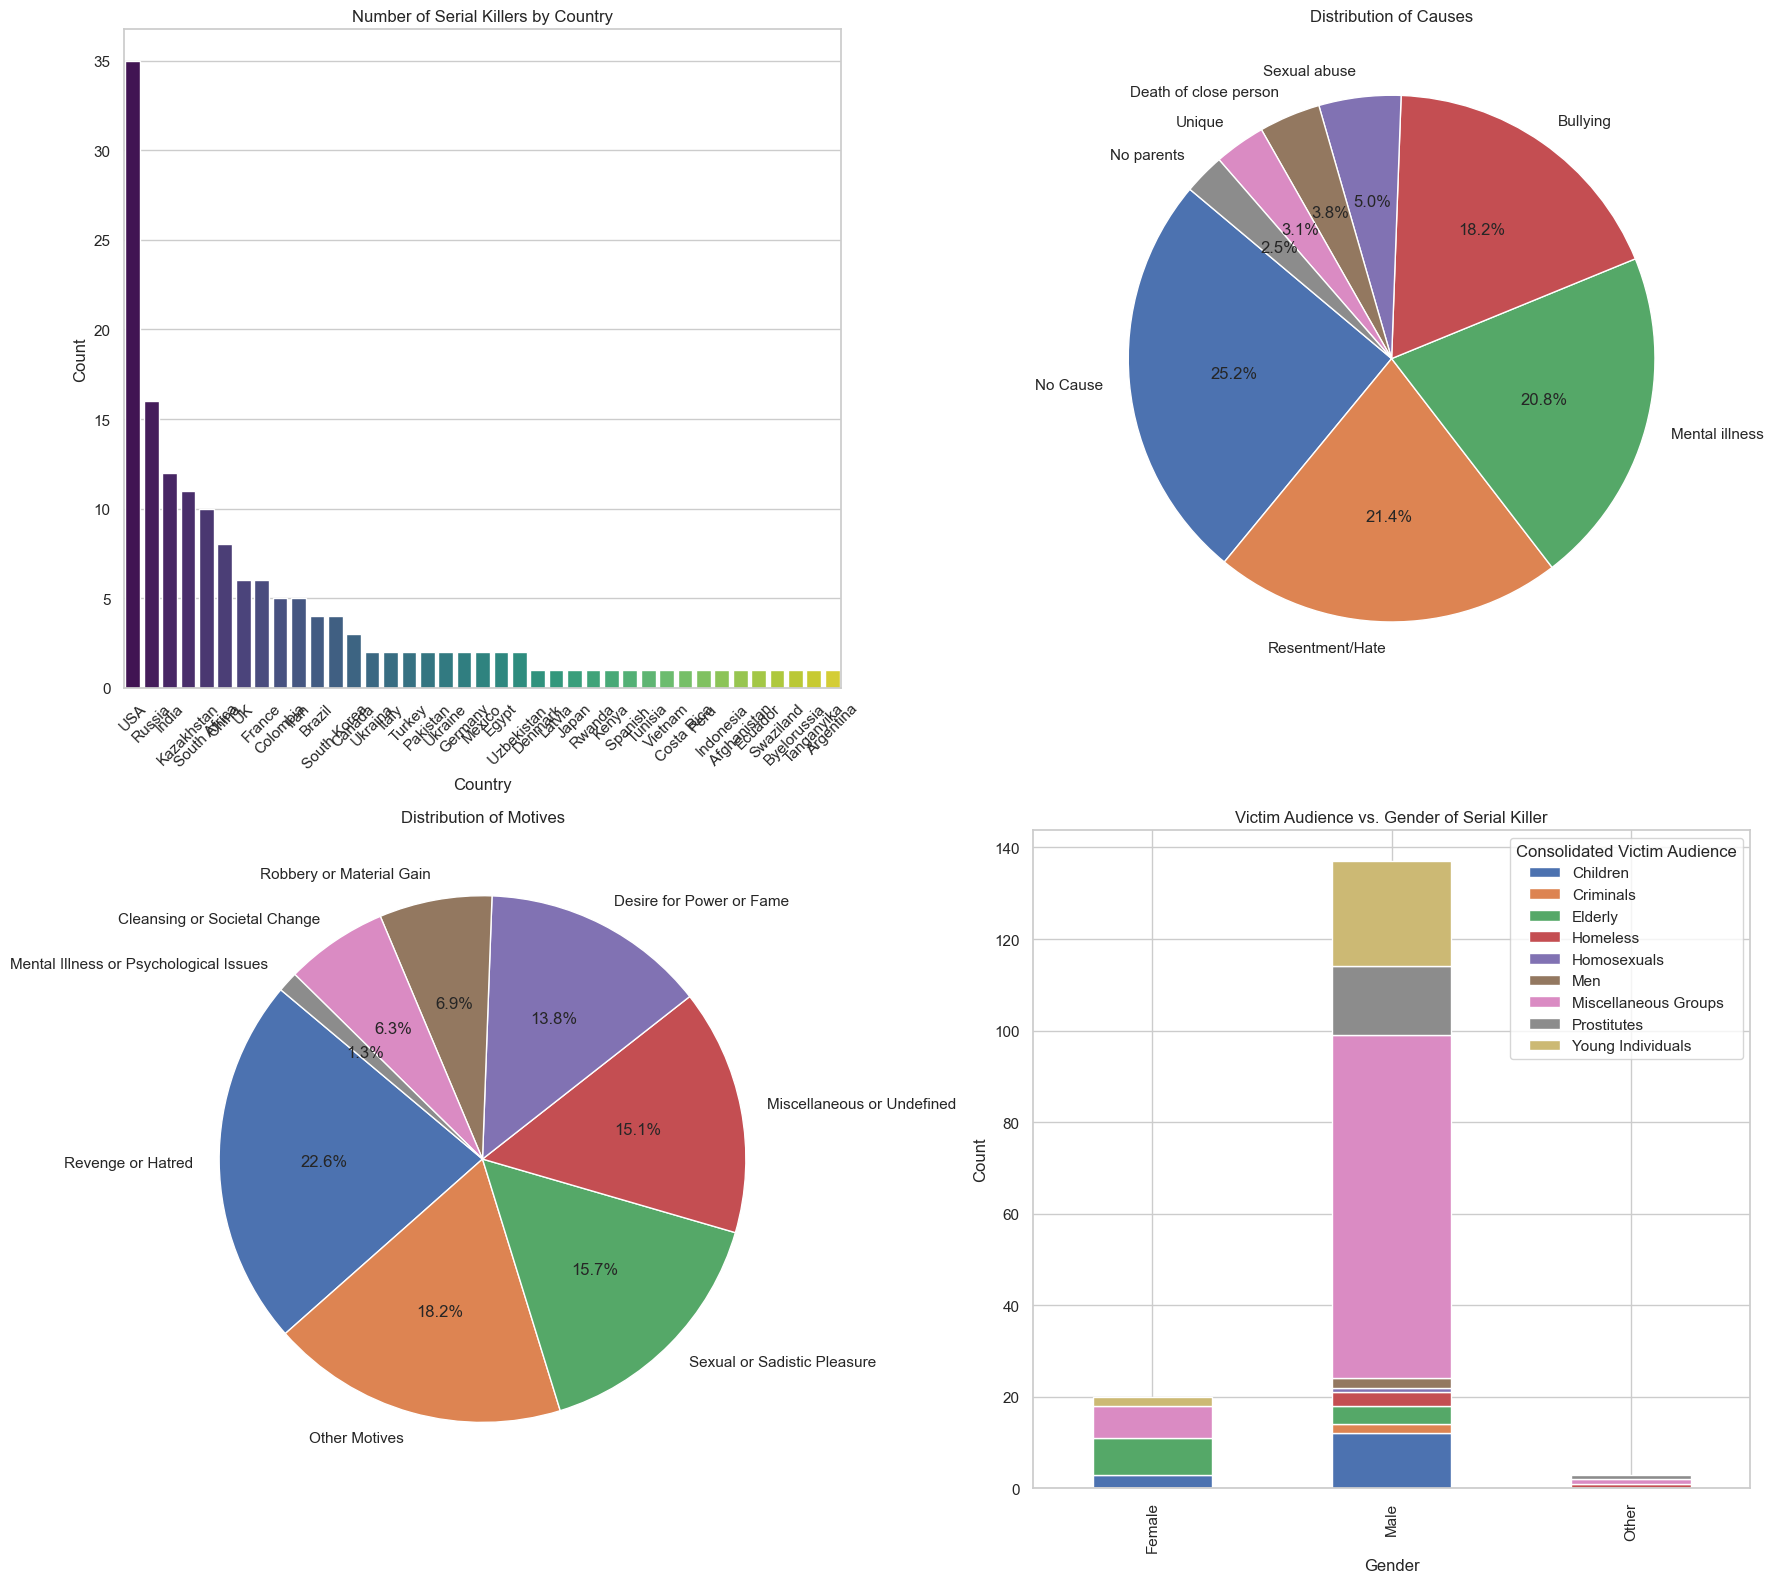

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(18, 16))

country_counts = data['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Number of Serial Killers by Country')
ax[0, 0].set_xlabel('Country')
ax[0, 0].set_ylabel('Count')
ax[0, 0].tick_params(axis='x', rotation=45)

# Cause Distribution
cause_counts = data['Cause'].value_counts()
ax[0, 1].pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
ax[0, 1].set_title('Distribution of Causes')

# Motive Distribution
motive_counts = data['Consolidated Motive'].value_counts()
ax[1, 0].pie(motive_counts, labels=motive_counts.index, autopct='%1.1f%%', startangle=140)
ax[1, 0].set_title('Distribution of Motives')

# Victim Distribution by Gender of Serial Killer
gender_victim = data.groupby(['Gender', 'Consolidated Victim Audience']).size().unstack(fill_value=0)
gender_victim.plot(kind='bar', stacked=True, ax=ax[1, 1])
ax[1, 1].set_title('Victim Audience vs. Gender of Serial Killer')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
def categorize_generation(year):
    if pd.isnull(year):
        return 'Unknown'
    year = int(year)
    if 1890 <= year <= 1915:
        return 'Lost Generation'
    elif 1901 <= year <= 1913:
        return 'Interbellum Generation'
    elif 1910 <= year <= 1924:
        return 'Greatest Generation'
    elif 1925 <= year <= 1945:
        return 'Silent Generation'
    elif 1946 <= year <= 1964:
        return 'Baby Boomer Generation'
    elif 1965 <= year <= 1979:
        return 'Generation X (Baby Bust)'
    elif 1975 <= year <= 1985:
        return 'Xennials'
    elif 1980 <= year <= 1994:
        return 'Millennials'
    elif 1995 <= year <= 2012:
        return 'iGen / Gen Z'
    elif 2013 <= year <= 2025:
        return 'Gen Alpha'
    else:
        return 'Unknown'

# Apply the function to create the new column
data['Generation'] = data['Birth date'].str.extract(r'(\d{4})').apply(categorize_generation)

data.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
data.dtypes

Name                             object
Gender                           object
Birth date                       object
Country                          object
Job                              object
First crime age                  object
Cause                            object
Motive                           object
Victim audience                  object
Proven victims                    int64
Total victims                     int64
Level of cruelty                 object
Crime longitude                   int64
Imprisoned years                  int64
Family                           object
Weapon                           object
Alive or dead                    object
By whom                          object
IQ                               object
memorable                       float64
unique                           object
Imprisoned years processed       object
IQ processed                     object
Resentment                       object
Consolidated Motive              object


In [12]:

from datetime import datetime

# Function to categorize birth years into generations
def categorize_generation(date):
    if pd.isnull(date):
        return 'Unknown'
    try:
        # Parse the date and extract the year
        if len(date) == 10:
            year = datetime.strptime(date, '%d.%m.%Y').year
        else:
            year = int(date)
        if 1890 <= year <= 1910:
            return 'Interbellum Generation'
        elif 1911 <= year <= 1924:
            return 'The Greatest Generation'
        elif 1925 <= year <= 1945:
            return 'Silent Generation'
        elif 1946 <= year <= 1964:
            return 'Baby Boomer Generation'
        elif 1965 <= year <= 1974:
            return 'Generation X'
        elif 1975 <= year <= 1983:
            return 'Xennials'
        elif 1984 <= year <= 1994:
            return 'Millennial/Gen Y'
        elif 1995 <= year <= 2012:
            return 'Generation Z'
        elif 2013 <= year <= 2024:
            return 'Generation Alpha'
        else:
            return 'Unknown'
    except ValueError:
        return 'Unknown'

# Apply the function to create the new column
data['Generation'] = data['Birth date'].apply(categorize_generation)

data.head()


,Name,Gender,Birth date,Country,Job,First crime age,Cause,Motive,Victim audience,Proven victims,...,By whom,IQ,memorable,unique,Imprisoned years processed,IQ processed,Resentment,Consolidated Motive,Consolidated Victim Audience,Generation
0,Luis Garavito,Male,25.01.1957,Colombia,Street vendor,35,Bullying,Desire for power,Children,193,...,Parents,Illiterate,NaN,NaN,22,Uneducated,NaN,Desire for Power or Fame,Children,Baby Boomer Generation
1,Pedro Lopez,Male,08.10.1948,Colombia,Sex worker,22,Sexual abuse,Revenge,Young girls,110,...,Teacher,Illiterate,NaN,occasionally exhume the victim's bodies from t...,25,Uneducated,NaN,Revenge or Hatred,Young Individuals,Baby Boomer Generation
2,Javed Iqbal,Male,08.10.1956,Pakistan,Businessman,42,Mental illness,Revenge,Young boys,100,...,None/No one,Intellectual,NaN,NaN,100,Intellectual,NaN,Revenge or Hatred,Young Individuals,Baby Boomer Generation
3,Mikhail Popkov,Male,07.03.1964,Russia,Police,34,Resentment/Hate,The desire to cleanse the world of vicious women,Women,86,...,Prostitutes/Women,No info,NaN,All the female victims were of average height ...,100,No info,NaN,Cleansing or Societal Change,Miscellaneous Groups,Baby Boomer Generation
4,Daniel Barbosa,Male,22.01.1930,Colombia,Street vendor,44,Bullying,Getting rid of virgins,Young girls,72,...,Family members,Intellectual,NaN,NaN,41,Intellectual,NaN,Other Motives,Young Individuals,Silent Generation


In [14]:
data=data.drop('unique')
data=data.drop('memorable')
data=data.drop('Resentment')

KeyError: "['unique'] not found in axis"

In [15]:
data.head()

,Name,Gender,Birth date,Country,Job,First crime age,Cause,Motive,Victim audience,Proven victims,...,By whom,IQ,memorable,unique,Imprisoned years processed,IQ processed,Resentment,Consolidated Motive,Consolidated Victim Audience,Generation
0,Luis Garavito,Male,25.01.1957,Colombia,Street vendor,35,Bullying,Desire for power,Children,193,...,Parents,Illiterate,NaN,NaN,22,Uneducated,NaN,Desire for Power or Fame,Children,Baby Boomer Generation
1,Pedro Lopez,Male,08.10.1948,Colombia,Sex worker,22,Sexual abuse,Revenge,Young girls,110,...,Teacher,Illiterate,NaN,occasionally exhume the victim's bodies from t...,25,Uneducated,NaN,Revenge or Hatred,Young Individuals,Baby Boomer Generation
2,Javed Iqbal,Male,08.10.1956,Pakistan,Businessman,42,Mental illness,Revenge,Young boys,100,...,None/No one,Intellectual,NaN,NaN,100,Intellectual,NaN,Revenge or Hatred,Young Individuals,Baby Boomer Generation
3,Mikhail Popkov,Male,07.03.1964,Russia,Police,34,Resentment/Hate,The desire to cleanse the world of vicious women,Women,86,...,Prostitutes/Women,No info,NaN,All the female victims were of average height ...,100,No info,NaN,Cleansing or Societal Change,Miscellaneous Groups,Baby Boomer Generation
4,Daniel Barbosa,Male,22.01.1930,Colombia,Street vendor,44,Bullying,Getting rid of virgins,Young girls,72,...,Family members,Intellectual,NaN,NaN,41,Intellectual,NaN,Other Motives,Young Individuals,Silent Generation


In [16]:
data=data.drop(columns=['unique', 'memorable', 'Resentment'])

In [17]:
data.head()

,Name,Gender,Birth date,Country,Job,First crime age,Cause,Motive,Victim audience,Proven victims,...,Family,Weapon,Alive or dead,By whom,IQ,Imprisoned years processed,IQ processed,Consolidated Motive,Consolidated Victim Audience,Generation
0,Luis Garavito,Male,25.01.1957,Colombia,Street vendor,35,Bullying,Desire for power,Children,193,...,Eldest,Knife,Dead,Parents,Illiterate,22,Uneducated,Desire for Power or Fame,Children,Baby Boomer Generation
1,Pedro Lopez,Male,08.10.1948,Colombia,Sex worker,22,Sexual abuse,Revenge,Young girls,110,...,Middle,Bare hands,Alive,Teacher,Illiterate,25,Uneducated,Revenge or Hatred,Young Individuals,Baby Boomer Generation
2,Javed Iqbal,Male,08.10.1956,Pakistan,Businessman,42,Mental illness,Revenge,Young boys,100,...,Middle,Acid,Dead,None/No one,Intellectual,100,Intellectual,Revenge or Hatred,Young Individuals,Baby Boomer Generation
3,Mikhail Popkov,Male,07.03.1964,Russia,Police,34,Resentment/Hate,The desire to cleanse the world of vicious women,Women,86,...,Eldest,Metal object,Alive,Prostitutes/Women,No info,100,No info,Cleansing or Societal Change,Miscellaneous Groups,Baby Boomer Generation
4,Daniel Barbosa,Male,22.01.1930,Colombia,Street vendor,44,Bullying,Getting rid of virgins,Young girls,72,...,Only child,Knife,Dead,Family members,Intellectual,41,Intellectual,Other Motives,Young Individuals,Silent Generation


In [1]:
# Cause Distribution
cause_counts = data['IQ'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of IQ')

NameError: name 'data' is not defined

In [19]:
data['IQ'].unique()

array(['Illiterate', 'Intellectual', 'No info', 'No info '], dtype=object)

In [23]:
data.loc[data['IQ processed'] == 'No info ', 'IQ processed'] = 'No info'

In [21]:
data['IQ'].unique()

array(['Illiterate', 'Intellectual', 'No info'], dtype=object)

Text(0.5, 1.0, 'Distribution of IQ')

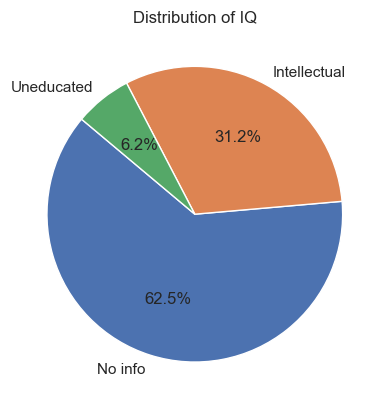

In [24]:
# Cause Distribution
cause_counts = data['IQ processed'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of IQ')

In [25]:
data=data.drop(columns=['IQ'])

In [26]:
data.to_csv('serialkillerdata.csv', index=False)

Text(0.5, 1.0, 'Distribution of Family')

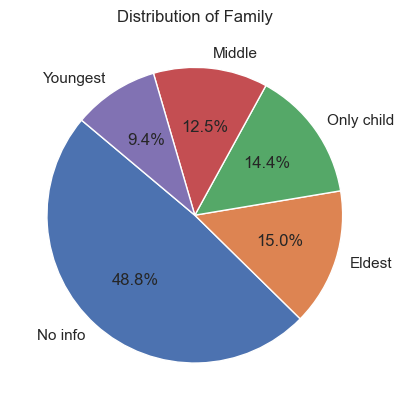

In [27]:
# Cause Distribution
cause_counts = data['Family'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Family')